In [144]:
import os
import pickle
c = os.getcwd()
os.chdir("../")
from Flocking import *
from graph_utils import *
from dynamics import *
os.chdir(c)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_net(Q):
    G = nx.Graph()

    for i in range(0,N):
        for j in range(0,N):
            if (np.linalg.norm(Q[i,:]-Q[j,:])<r):
                if(not G.has_edge(i,j)):
                    G.add_edge(i,j)
    return(G)

def rho_h(z,h=0.2):
    if (0 <= z and z < h):
        return 1
    if (h <= z and z <= 1):
        return (1/2)*(1+np.cos(np.pi*(z-h)/(1-h)))
    else:
        return 0
    
def sigma_norm(z,epsilon=0.1):
    return (1/epsilon)*(np.sqrt(1+epsilon*(np.linalg.norm(z))**2)-1)

def sigma_grad(z,epsilon=0.1):
    return z/(1+epsilon*sigma_norm(z,epsilon))

def sigma_1(z):
    return z/(np.sqrt(1+z**2))

def phi(z,a=5,b=5):
    c = np.abs(a-b)/(np.sqrt(4*a*b))
    return (1/2)*((a+b)*sigma_1(z+c)+(a-b))

def phi_alpha(z,d,r):
    r_alpha = sigma_norm(r)
    d_alpha = sigma_norm(d)
    return rho_h(z/r_alpha)*phi(z-d_alpha)

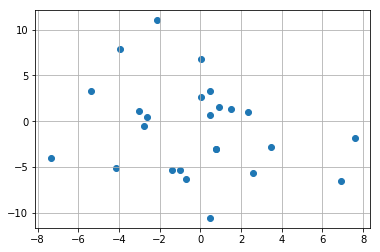

In [2]:
N=25
d=7
r=1.2*d
h=0.2
Q = np.sqrt(25)*np.random.randn(N,2)
P = (10)*np.random.rand(N,2)-1
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

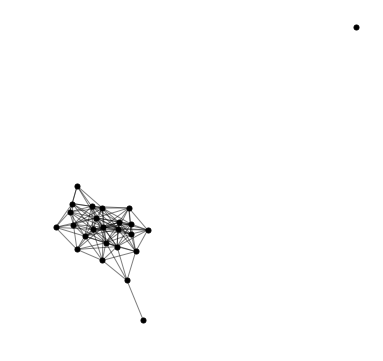

In [3]:
G = get_net(Q)
p=draw_graph(G,node_size=25,fig_size=6)

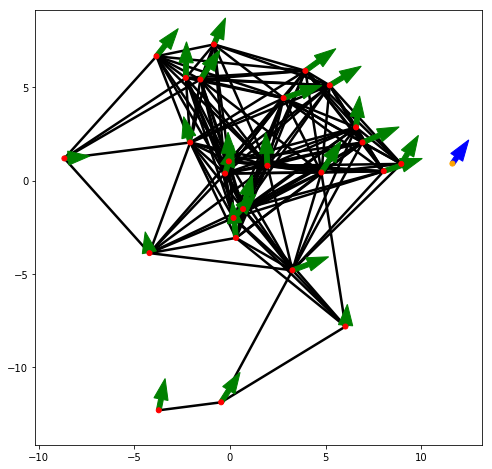

In [4]:
F = Flock(P_dot,
          number_of_agents=25,
          gamma_agent=True)

p = F.plot(Graph=True)

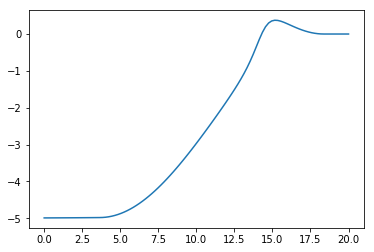

In [5]:
z = np.linspace(0,20,100)
y = np.zeros(len(z))
for i in range(0,len(y)):
    y[i] = phi_alpha(z[i],d,r)
    
plt.plot(z,y)

In [6]:
def time_step(Q,P,dt=0.01):
    G = get_net(Q)
    P = P + dt*P_dot(Q,G)
    Q = Q + dt*P
    return Q,P

In [7]:
T=10
dt=0.01
t=0
while t<T:
    Q,P = time_step(Q,P)
    t = t+dt

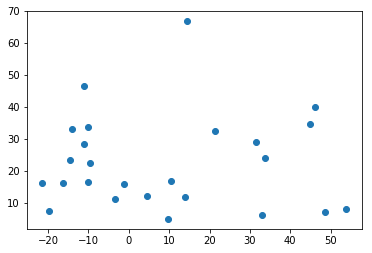

In [8]:
plt.scatter(Q[:,0],Q[:,1])

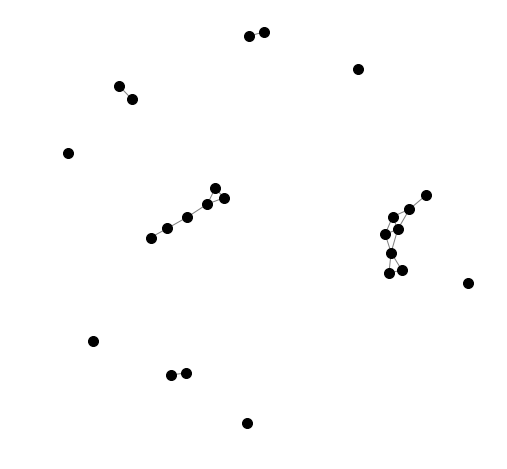

In [9]:
p=draw_graph(get_net(Q))

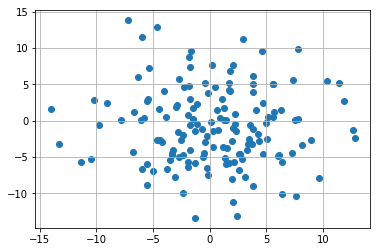

In [220]:
N=150
Q = np.sqrt(25)*np.random.randn(N,2)
P = (5)*np.random.rand(N,2)-1
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

In [221]:
# Q = pickle.load(open("Flock_Positions","rb"))[0]
# P = pickle.load(open("Flock_Velocities","rb"))[0]

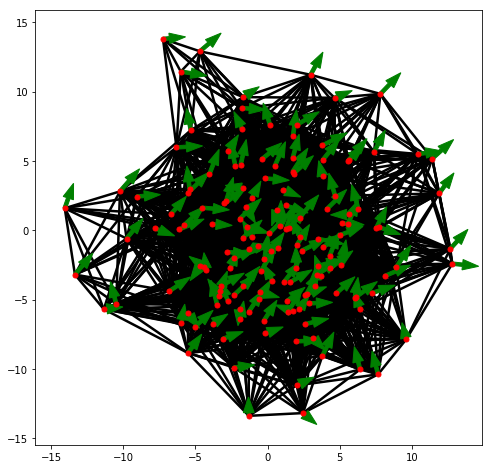

In [222]:
F = Flock(number_of_agents=150,
          initial_position=Q,
          initial_velocity=P,
          inter_agent_distance=7,
          gamma_agent=False)

p = F.plot(arrow_width=0.25)
# plt.title("Initial state for flock following F2", fontsize=25)
# plt.savefig("F2_start",bbpx_inches='tight')

In [223]:
nx.is_connected(F.G)

True

In [224]:
F.run_sim(T=10, save_data=True)

KeyboardInterrupt: 

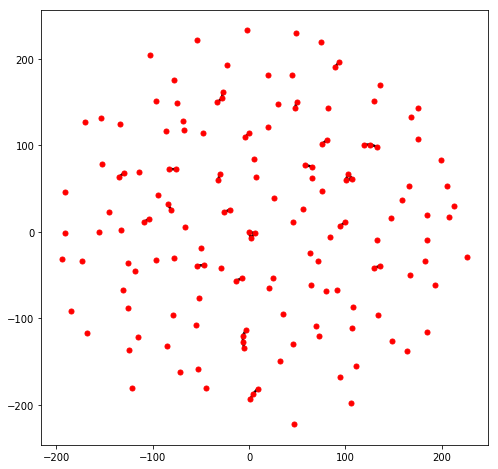

In [225]:
q=F.plot(arrow_width=0.1);
# plt.title("A late state for a flock following F3", fontsize=25)
# plt.savefig("F3_end",bbpx_inches='tight')

In [191]:
P_sim = F.P_sim
t = F.sim_time
V = np.zeros((len(P_sim),P_sim[0].shape[0]))
for i in range(0,len(P_sim)):
    for j in range(0,P_sim[i].shape[0]):
        V[i,j] = np.angle(complex(P_sim[i][j,0], P_sim[i][j,1]))
V

array([[ 1.06565443, -0.02848504, -2.37673829, ...,  1.57217589,
         1.58240316,  1.83786425],
       [ 0.98959628,  0.01907858, -2.29469981, ...,  1.29937286,
         1.43096007,  1.81522029],
       [ 0.91622849,  0.05870329, -2.25125646, ...,  0.82618701,
         1.27018403,  1.79662994],
       ...,
       [ 1.56502206,  1.56502105,  1.56502101, ...,  1.56502094,
         1.5650213 ,  1.56502105],
       [ 1.56502205,  1.56502105,  1.56502101, ...,  1.56502094,
         1.5650213 ,  1.56502105],
       [ 1.56502205,  1.56502105,  1.56502101, ...,  1.56502094,
         1.5650213 ,  1.56502105]])

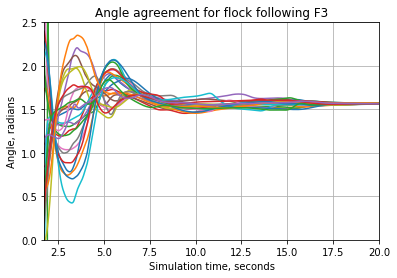

In [205]:
for i in range(0,V.shape[1]):
    plt.plot(t,V[:,i])
plt.grid()
plt.xlabel("Simulation time, seconds")
plt.ylabel("Angle, radians")
plt.title("Angle agreement for flock following F3")
plt.xlim(1.75,20)
plt.ylim(0,2.5)
plt.savefig("angle",bbpx_inches='tight')

In [ ]:
fig_size=8
with_labels=False,
node_size=25,
width=2.5,
arrow_width=.25
for k in range(0,len(F.Q_sim)):
    if k % 5 == 0:
        F.Q = F.Q_sim[k]
        F.G = F.get_net(F.Q)
        F.P = F.P_sim[k]
        #F.p = F.p_sim[k]
        #F.q = F.q_sim[k]

        p = plt.figure(figsize=(fig_size,fig_size))
        unit = np.zeros(F.P.shape)
        norms = np.zeros(F.N)
        for i in range(0,F.N):
            norms[i] = np.linalg.norm(F.P[i])
            unit[i] = F.P[i]/norms[i]
        rel = np.zeros(F.P.shape)
        for i in range(0,F.N):
            rel[i] = unit[i]*(np.linalg.norm(F.P[i])/max(norms))

        for i in range(0,F.N):
            plt.arrow(F.Q[i,0],F.Q[i,1],rel[i,0],rel[i,1],
                      width=arrow_width,
                      edgecolor='green',
                      facecolor='green')
        G = F.G.copy()
        Q = F.Q.copy()
        node_colors = ['red']

#         rel_gamma = F.p/max(norms)
#         plt.arrow(F.q[0,0],F.q[0,1],rel_gamma[0,0],rel_gamma[0,1],
#                     width=arrow_width,
#                     edgecolor='blue',
#                     facecolor='blue')
#         G.add_node(F.N)
#         node_colors = []
#         for node in G:
#             if node < F.N:
#                 node_colors.append('red')
#             if node == F.N:
#                 node_colors.append('orange')
#         Q = np.append(Q,F.q).reshape(F.N+1,2)
        
        nx.draw_networkx(G,
                        pos=Q,
                        node_color=node_colors,
                        edge_color='black',
                        width=width,
                        node_size=node_size,
                        with_labels=False)
        plt.xlim(min(Q[:,0])-max(rel[:,0]),max(Q[:,0])+max(rel[:,0]))
        plt.ylim(min(Q[:,1])-max(rel[:,1]),max(Q[:,1])+max(rel[:,1]))
        p.savefig('sim_pic/'+str(k)+'.png')
        plt.cla()

In [32]:
import imageio
import os
ids = list()
for i in range(0,len(F.Q_sim)):
    if i % 5 == 0:
        ids.append('sim_pic/'+str(i)+'.png')

images = []
for i in ids:
    images.append(imageio.imread(i))
imageio.mimsave('../Data/Flock_fragment.gif', images, 'GIF', duration=0.05)

In [33]:
F.Q_sim

[array([[   7.21883622,  -35.44717615],
        [  47.3119706 ,  -44.75118848],
        [ -61.14195625,  -32.2883764 ],
        [ -66.99242719,  -40.97378967],
        [  24.40841698,   53.31155637],
        [  28.58628189,  -86.22180655],
        [   7.47238104,   62.78677906],
        [-108.82169047,  -45.815846  ],
        [  20.69769055,   42.91436326],
        [  31.27726379,  -54.9276218 ],
        [ -67.68113066,   -6.65051638],
        [ -46.80248705, -102.38625505],
        [  37.24812748,   22.99871263],
        [ -27.20850372,  -20.97213339],
        [  14.88056863,   -5.78300121],
        [  12.7021697 ,   49.67257881],
        [ -58.96698166,   36.53653641],
        [  20.15710041,   22.08505334],
        [   5.52510409,  -24.60871446],
        [  19.56506726,   19.73308648],
        [  55.38939443,  -16.02639388],
        [  40.62305901,   35.56215259],
        [  15.11224305,   48.70968687],
        [ -84.26564503, -131.48260377],
        [  29.1262652 ,   13.92452779]])

In [226]:
Q = F.Q_sim#pickle.load(open("Flock_Positions_frag","rb"))
P = F.P_sim#pickle.load(open("Flock_Velocities_frag","rb"))
C = np.zeros(len(Q))
L = np.zeros(len(Q))
G = []
connected=1
for i in range(0,len(Q)):
    G.append(F.get_net(Q[i]))
    C[i] = nx.average_clustering(G[i])
    if(nx.is_connected(G[i])):
        L[i] = nx.average_shortest_path_length(G[i])
    if(nx.is_connected(G[i])==False and connected==0):
        connected=i

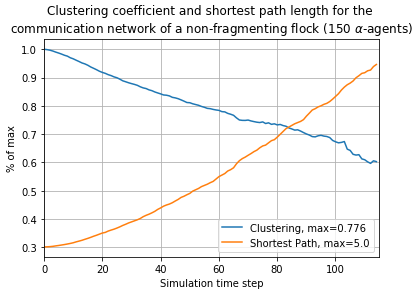

In [231]:
connected=115
x = np.linspace(0,len(Q),len(Q))
plt.plot(x[0:connected],
         C[0:connected]/max(C),
         label="Clustering, max={}".format(round(max(C),3)))
plt.plot(x[0:connected],
         L[0:connected]/max(L),
         label="Shortest Path, max={}".format(round(max(L)),3))

plt.title("Clustering coefficient and shortest path length for the \n"+ 
          r"communication network of a non-fragmenting flock (150 $\alpha$-agents)")
plt.ylabel("% of max")
plt.xlabel("Simulation time step")
plt.legend()
plt.grid()
plt.xlim(0,115)
plt.savefig("fragment-flock",bbpx_inches='tight')

In [207]:
C = np.zeros(len(F.Q_sim))
L = np.zeros(len(F.Q_sim))
G = []
connected=1
for i in range(0,len(F.Q_sim)):
    G.append(F.get_net(F.Q_sim[i]))
    C[i] = nx.average_clustering(G[i])
    if(nx.is_connected(G[i])):
        L[i] = nx.average_shortest_path_length(G[i])
    if(nx.is_connected(G[i])==False and connected==0):
        connected=i

KeyboardInterrupt: 

In [ ]:
connected=157

In [ ]:
max(L)

In [ ]:
x = np.linspace(0,len(F.Q_sim),len(F.Q_sim))
plt.plot(x[connected:len(x)],
         C[connected:len(x)]/max(C),
         label="Clustering, max={}".format(round(max(C),3)))
plt.plot(x[connected:len(x)],
         L[connected:len(x)]/max(L),
         label="Shortest Path, max={}".format(round(max(L)),3))

plt.title("Clustering coefficient and shortest path length for the \n"+ 
          r"communication network of a non-fragmenting flock (150 $\alpha$-agents)")
plt.ylabel("% of max")
plt.xlabel("Simulation time step")
plt.legend()
plt.grid()
plt.savefig("No-fragment-flock",bbpx_inches='tight')

In [106]:
connected

1

In [254]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [276]:
dist = []
for i in range(0,len(G)):
    dist.append(degree_distribution(G[i]))

In [263]:
dist[10]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

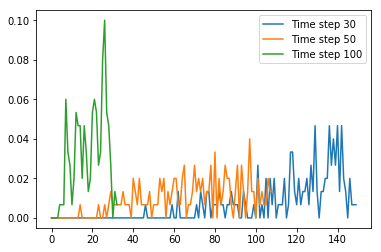

In [266]:
for i in [30,50,100]:
    plt.plot(dist[i][0],dist[i][1], label="Time step {}".format(i))
plt.legend()

In [150]:
from scipy.stats import gaussian_kde as kde

In [191]:
y=kde(dist[1000][1]*150)

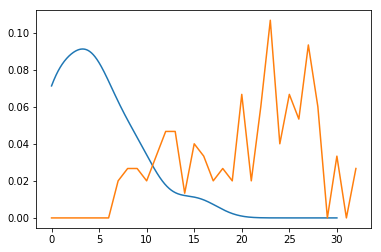

In [192]:
xx = np.linspace(0,30,1000)
plt.plot(xx,y(xx))
plt.plot(dist[1000][0],dist[1000][1])

In [209]:
freq = np.repeat(dist[1000][0],(dist[1000][1]*150).astype(int))

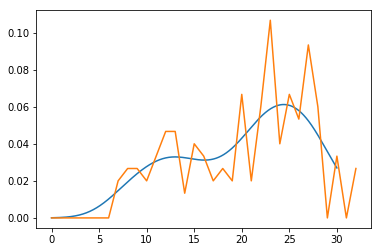

In [210]:
y=kde(freq)
xx = np.linspace(0,30,1000)
plt.plot(xx,y(xx))
plt.plot(dist[1000][0],dist[1000][1])

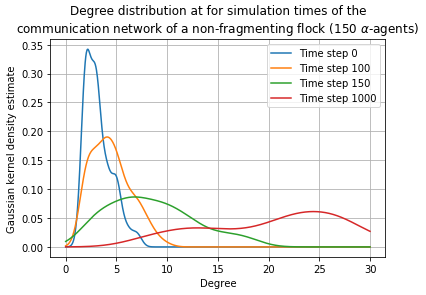

In [277]:
for i in [0,100,150,1000]:
    freq = np.repeat(dist[i][0],(dist[i][1]*150).astype(int))
    y=kde(freq)
    xx = np.linspace(0,30,1000)
    plt.plot(xx,y(xx),label="Time step {}".format(i))
plt.legend()
plt.title("Degree distribution at for simulation times of the\n"+
         r"communication network of a non-fragmenting flock (150 $\alpha$-agents)")
plt.xlabel("Degree")
plt.ylabel("Gaussian kernel density estimate")
plt.grid()
plt.savefig("No-fragment-flock_degree",bbpx_inches='tight')